# Case Study 1

# Understanding the Loan Dataset:

In [116]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

In [117]:
loan_data = pd.read_csv(r"C:\Users\User\Downloads\loans_full_schema.csv")

In [118]:
loan_data.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


# Size of the dataset

In [119]:
loan_data.shape #Data Consists of 10k rows with 55 variables

(10000, 55)

In [120]:
l_df = loan_data[loan_data.duplicated()]
print("Number of duplicate rows:" , l_df.shape)

Number of duplicate rows: (0, 55)


Data Description : The dataset consists of 10k rows with 55 features describing different features that are involved in availing a loan. It consists of object, float and integer datatypes. The dataset does not contain any dupicate value though it consists missing and NAN values. These values need to be handled for this data to be used to develop a prediction model. 

In [121]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

The above output indicates that there are about 5 columns that have more than 60% of missing data values 

# Data Cleaning

Data Cleaning :
The following steps were taken to clean the dataset:
1)All those columns that had more than 60% of the data missing were removed.
2)All those columns that were of type object were encoded into numeric values and then converted to category type. 

# Handling missing values

In [122]:
perc = 60.0
min_count =  int(((100-perc)/100)*loan_data.shape[0] + 1)
loan_df = loan_data.dropna( axis=1,thresh=min_count)

In [123]:
loan_df['emp_title'].fillna(loan_df['emp_title'].mode()[0], inplace = True)
#loan_df.apply(lambda x: x.fillna(x.mean())) 
loan_df = loan_df[loan_df['emp_length'].notna()]
loan_df = loan_df[loan_df['num_accounts_120d_past_due'].notna()]
loan_df = loan_df[loan_df['months_since_last_credit_inquiry'].notna()]
loan_df = loan_df[loan_df['debt_to_income'].notna()]
loan_df["months_since_last_delinq"].fillna(loan_df["months_since_last_delinq"].mean(), inplace=True)

print(loan_df.isna().sum())

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
months_since_last_delinq            0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_

In [124]:
#This indicates no duplicate values are present
loan_rows_df = loan_df[loan_df.duplicated()]
loan_rows_df.shape

(0, 51)

# Encoding of categorical variable

In [125]:
obj_df = loan_df.select_dtypes(include=['object']).copy()
obj_df.head()

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar-2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt_consolidation,individual,C,C1,Feb-2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb-2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt_consolidation,individual,A,A3,Jan-2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit_card,joint,C,C3,Mar-2018,Current,whole,Cash


In [126]:
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import LabelEncoder

cat_list=["emp_title","state","homeownership","verified_income","loan_purpose","application_type","grade","sub_grade","issue_month","loan_status","initial_listing_status","disbursement_method"]

for i in cat_list:
    le = LabelEncoder()
    encoded = le.fit_transform(loan_df[i])
    loan_df[i] = encoded

In [127]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7772 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         7772 non-null   int32  
 1   emp_length                        7772 non-null   float64
 2   state                             7772 non-null   int32  
 3   homeownership                     7772 non-null   int32  
 4   annual_income                     7772 non-null   float64
 5   verified_income                   7772 non-null   int32  
 6   debt_to_income                    7772 non-null   float64
 7   delinq_2y                         7772 non-null   int64  
 8   months_since_last_delinq          7772 non-null   float64
 9   earliest_credit_line              7772 non-null   int64  
 10  inquiries_last_12m                7772 non-null   int64  
 11  total_credit_lines                7772 non-null   int64  
 12  open_c

<Figure size 864x720 with 0 Axes>

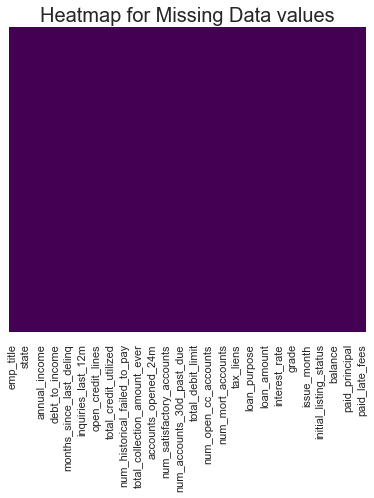

<Figure size 864x720 with 0 Axes>

In [175]:
sn.heatmap(loan_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap for Missing Data values', fontsize=20)
plt.figure(figsize=(12,10))

In [128]:
loan_df.describe()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,7772.000000,7772.000000,7772.000000,7772.00000,7.772000e+03,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,...,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,2123.093927,5.904143,22.575528,0.87069,8.343118e+04,0.861297,19.166418,0.211400,36.987069,2001.741122,...,9.297607,1.070767,1.097401,0.820510,0.073340,14572.673439,2585.706060,1972.202495,613.406481,0.097072
std,1167.856994,3.696113,14.711206,0.92847,6.873102e+04,0.739920,14.784109,0.666849,14.458076,7.406424,...,5.849424,0.804302,0.448803,0.383787,0.260711,10040.869292,4143.667292,4073.753820,525.163430,1.641312
min,0.000000,0.000000,0.000000,0.00000,3.000000e+03,0.000000,0.000000,0.000000,1.000000,1963.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1153.000000,2.000000,9.000000,0.00000,5.000000e+04,0.000000,11.140000,0.000000,36.987069,1998.000000,...,5.000000,0.000000,1.000000,1.000000,0.000000,6720.632500,947.407500,594.580000,227.580000,0.000000
50%,2173.000000,6.000000,22.000000,0.00000,7.000000e+04,1.000000,17.510000,0.000000,36.987069,2003.000000,...,9.000000,1.000000,1.000000,1.000000,0.000000,12501.870000,1606.275000,1002.135000,459.150000,0.000000
75%,3102.250000,10.000000,35.000000,2.00000,1.000000e+05,1.000000,24.820000,0.000000,36.987069,2006.000000,...,13.000000,2.000000,1.000000,1.000000,0.000000,21142.405000,2669.990000,1715.095000,840.405000,0.000000
max,4115.000000,10.000000,49.000000,2.00000,2.300000e+06,2.000000,469.090000,13.000000,118.000000,2015.000000,...,30.000000,2.000000,5.000000,1.000000,1.000000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


# Outlier Detection

Text(0.5, 1.0, 'Visualizing Outlier for loan amount feature')

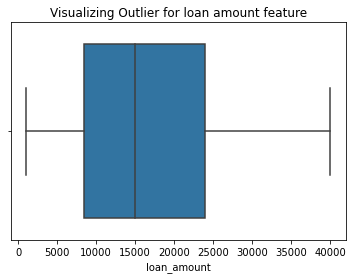

In [140]:
import seaborn as sns
sns.boxplot(loan_df['loan_amount'])
plt.title("Visualizing Outlier for loan amount feature")

Text(0.5, 1.0, 'Visualizing Outlier for debt_to_income feature')

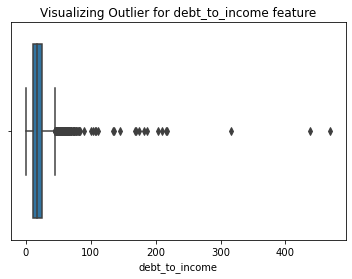

In [136]:
sns.boxplot(loan_df['debt_to_income'])
plt.title("Visualizing Outlier for debt_to_income feature")

Outliers are values that are varies significantly from the other set of values in the given dataset. Handling these values 
improves in the overall accuracy and efficiency of the final model. One way to visualize outliers efficiently is through a 
box plot. The above two visualizations are a sample of a box plot for two different columns in a dataset to determine outliers.
The first visualization shows that there is not many outliers in the annual_income column where as all the points above 50, 
which is third Quartile range are considered outliers.


In [131]:
Q1 = loan_df.quantile(0.25)
Q3 = loan_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

emp_title                             1949.2500
emp_length                               8.0000
state                                   26.0000
homeownership                            2.0000
annual_income                        50000.0000
verified_income                          1.0000
debt_to_income                          13.6800
delinq_2y                                0.0000
months_since_last_delinq                 0.0000
earliest_credit_line                     8.0000
inquiries_last_12m                       2.0000
total_credit_lines                      15.0000
open_credit_lines                        7.0000
total_credit_limit                  228728.2500
total_credit_utilized                47510.5000
num_collections_last_12m                 0.0000
num_historical_failed_to_pay             0.0000
current_accounts_delinq                  0.0000
total_collection_amount_ever             0.0000
current_installment_accounts             2.0000
accounts_opened_24m                     

In [132]:
print(loan_df < (Q1 - 1.5 * IQR)) |(loan_df > (Q3 + 1.5 * IQR))

      emp_title  emp_length  state  homeownership  annual_income  \
0         False       False  False          False          False   
1         False       False  False          False          False   
2         False       False  False          False          False   
3         False       False  False          False          False   
4         False       False  False          False          False   
...         ...         ...    ...            ...            ...   
9995      False       False  False          False          False   
9996      False       False  False          False          False   
9997      False       False  False          False          False   
9998      False       False  False          False          False   
9999      False       False  False          False          False   

      verified_income  debt_to_income  delinq_2y  months_since_last_delinq  \
0               False           False      False                     False   
1               False      

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

The below data shows the amount of skewness in each columns of the dataset. The ideal range of skewness is between 0 and 1. 
The output for some of the column shows that either they are skewed severely to the right having very high values (eg:tax_liens) or skewed to the left extreme indicating very low values compared to the rest of the data. There are some columns that are left skewed but not to any extreme. This shows that the outlier presence in our dataset is right skewed overall.

In [133]:
for i in loan_df.columns:
    print(i, ":", loan_df[i].skew())

emp_title : -0.10860328447577824
emp_length : -0.14608077049068896
state : 0.09436291925879355
homeownership : 0.2590067467691451
annual_income : 9.37357187569123
verified_income : 0.22657430788719568
debt_to_income : 10.192392147794365
delinq_2y : 5.839866621598547
months_since_last_delinq : 0.6194377437896186
earliest_credit_line : -0.9586409310633202
inquiries_last_12m : 2.275356058590289
total_credit_lines : 0.9389673625002491
open_credit_lines : 1.1577995308840943
total_credit_limit : 2.786398593676909
total_credit_utilized : 4.147335961171374
num_collections_last_12m : 9.9693943237158
num_historical_failed_to_pay : 44.11985277152471
current_accounts_delinq : 0
total_collection_amount_ever : 69.5702712674664
current_installment_accounts : 2.7138127676492885
accounts_opened_24m : 1.3266173311294236
months_since_last_credit_inquiry : 0.7915579845161921
num_satisfactory_accounts : 1.1589719550742061
num_accounts_120d_past_due : 0
num_accounts_30d_past_due : 0
num_active_debit_account

# Removing Outliers from dataset

In [142]:
for i in loan_df.columns:
    a=loan_df[i].quantile(0.10)
    b=loan_df[i].quantile(0.90)
    loan_df[i] = np.where(loan_df[i] <a, a,loan_df[i])
    loan_df[i] = np.where(loan_df[i] >b, b,loan_df[i])
    
for i in loan_df.columns:
    print(i, ":", loan_df[i].skew())

emp_title : -0.07622353615586588
emp_length : -0.07981672701239567
state : 0.04716363431503467
homeownership : 0.2590067467691451
annual_income : 0.607911620747043
verified_income : 0.22657430788719568
debt_to_income : 0.22057642651525747
delinq_2y : 2.0617376072205733
months_since_last_delinq : 0.04176777683556481
earliest_credit_line : -0.4761799359232085
inquiries_last_12m : 0.5768461878710839
total_credit_lines : 0.34875667431611235
open_credit_lines : 0.41819245916276476
total_credit_limit : 0.6733627582657166
total_credit_utilized : 0.6981596818886182
num_collections_last_12m : 0
num_historical_failed_to_pay : 2.0108857101132633
current_accounts_delinq : 0
total_collection_amount_ever : 2.2718743066286704
current_installment_accounts : 0.6509379712479689
accounts_opened_24m : 0.3871884213871265
months_since_last_credit_inquiry : 0.5538683021058077
num_satisfactory_accounts : 0.42138250244094794
num_accounts_120d_past_due : 0
num_accounts_30d_past_due : 0
num_active_debit_accounts

The above technique is called Quantile based flooring and capping. We calculate the 10th and 90th percentile of each column 
and those vales will be used for this technique. The skewness report after doing this shows that data is less skewed 
compared to the previous skewness report provided above.

# Data Visualizations

Five visualizations were made to determine the interest rate distribution, loan amount availed for different purposes,
how the interest rate varies with the loan grade, debt to income ratio of different states and the relationship between the 
loan amount received and the annual income of applicants.

<Figure size 1008x576 with 0 Axes>

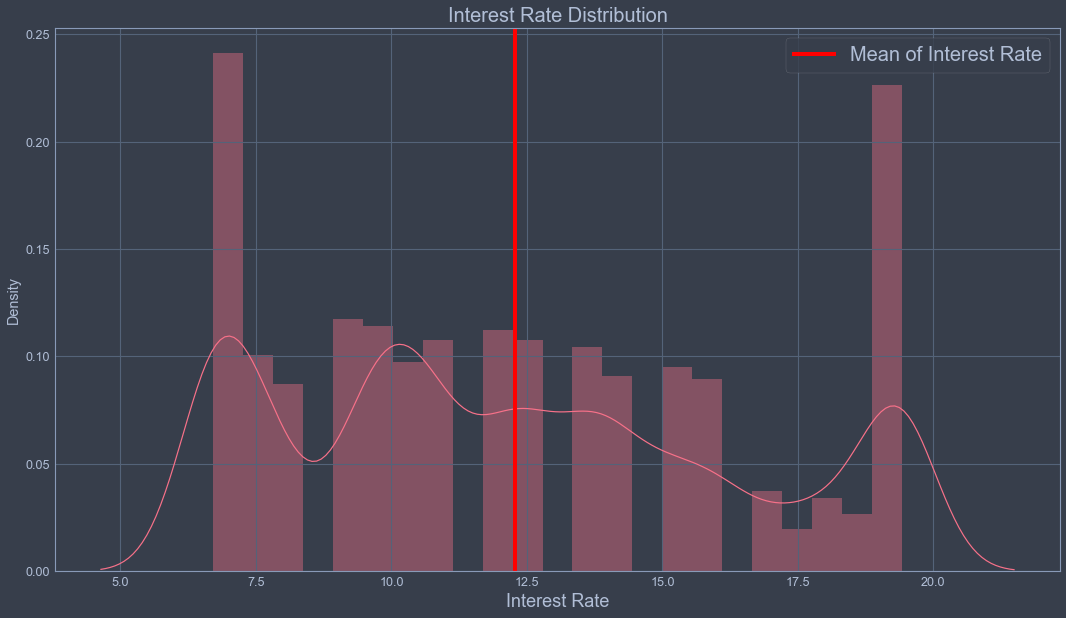

In [146]:
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sn.set_palette("husl")
plt.figure(figsize=(18,10))
sn.distplot(loan_df['interest_rate'], hist='density')
plt.axvline(x=loan_df.interest_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

This graph shows how the density of interest rate distribution with an average of 12.5% 

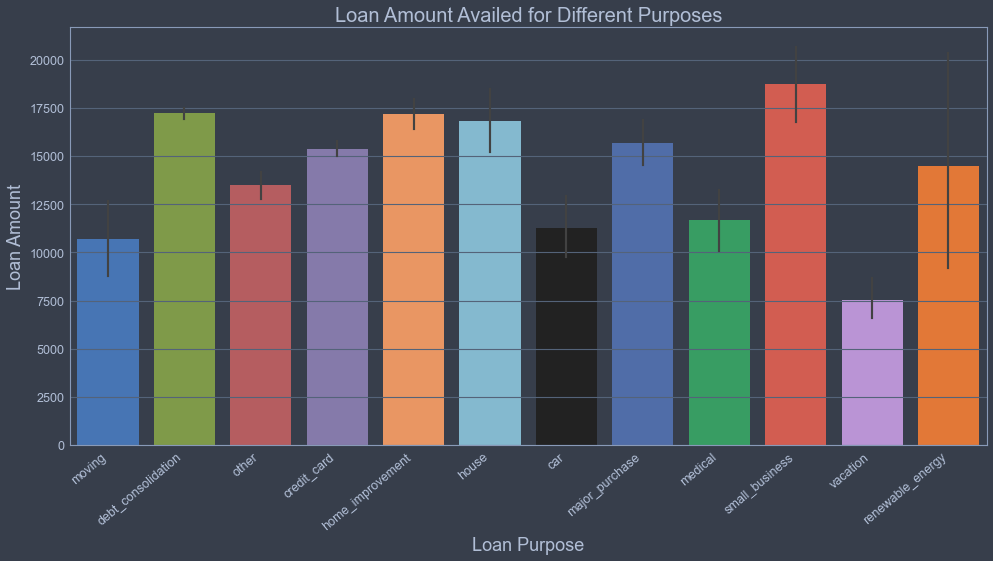

In [148]:
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')
ax=sn.barplot(obj_df.loan_purpose, loan_df.loan_amount)

plt.title('Loan Amount Availed for Different Purposes', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=18)
plt.ylabel('Loan Amount', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


This helps us understand the business domains that mostly require loans. Small business have the highest requirement which 
could be attributed to their scale and lack of background support 

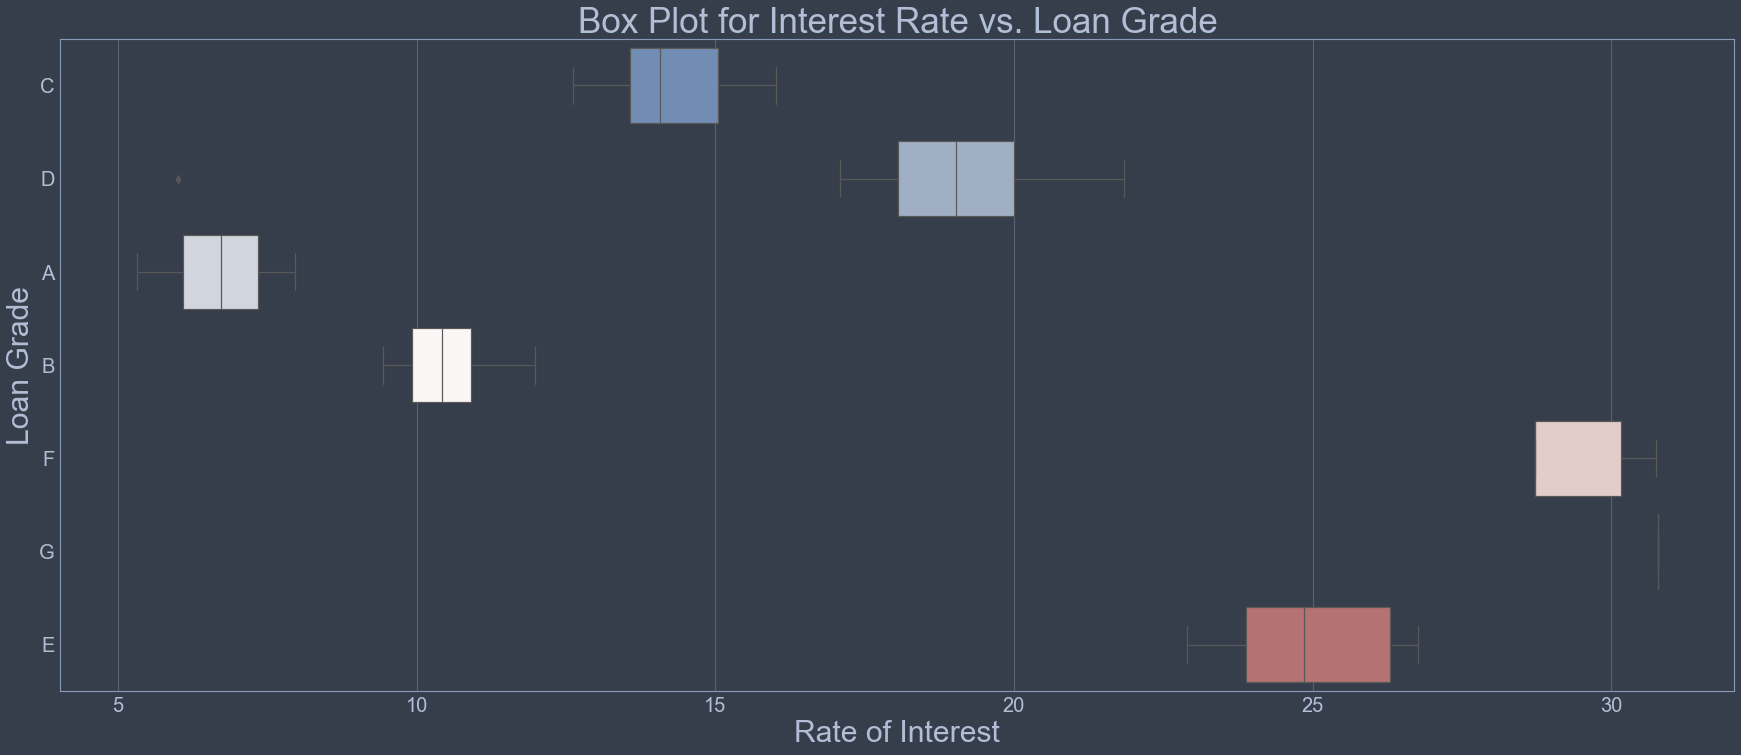

In [251]:
plt.figure(figsize=(30,12))
sn.boxplot(x=loan_df.interest_rate, y=obj_df.grade, palette="vlag")
plt.title('Box Plot for Interest Rate vs. Loan Grade', fontsize=35)
plt.xlabel('Rate of Interest', fontsize=30)
plt.ylabel('Loan Grade', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

This graph shows how rate of interest varies with respect to the loan grade represented in the form of a boxplot

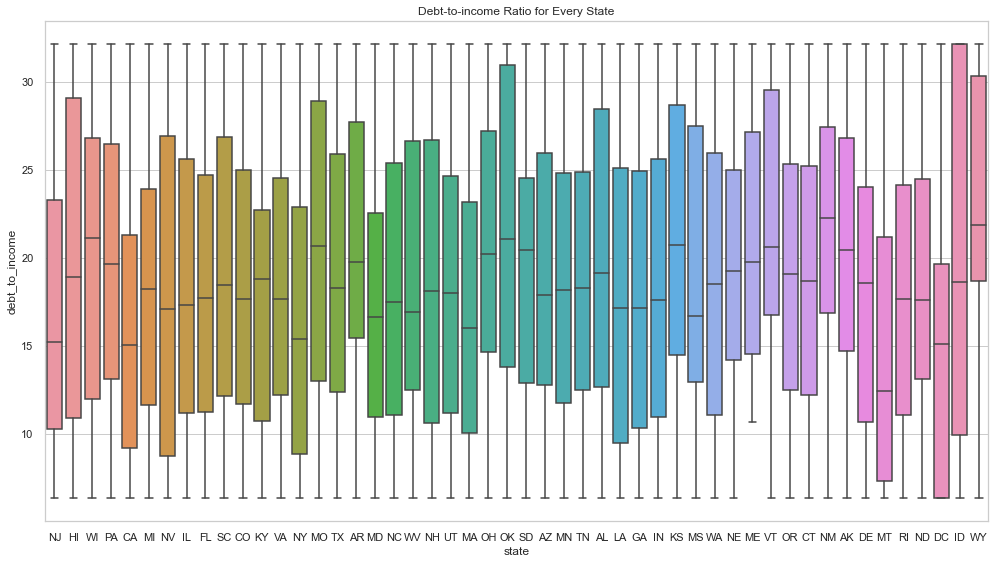

In [174]:
plt.figure(figsize=(14,8))

ax=sn.boxplot(x=obj_df.state, y=loan_df.debt_to_income)
plt.title("Debt-to-income Ratio for Every State")
plt.tight_layout()


This graph explains the debt to income ratio of different states. Idaho seems to be the state with the highest ratio

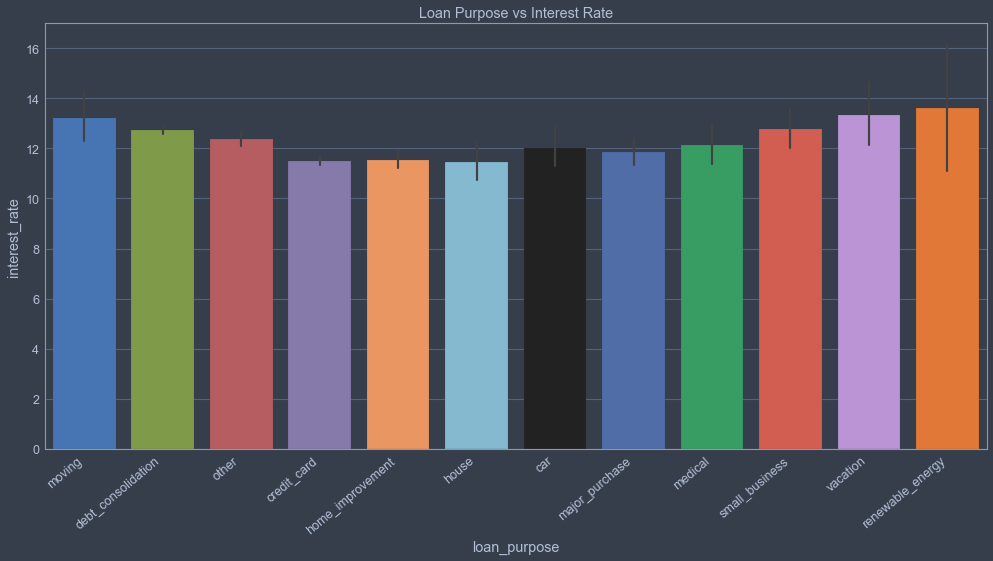

In [251]:
plt.figure(figsize=(14,8))
jtplot.style(theme='onedork')
ax=sn.barplot(obj_df.loan_purpose, loan_df.interest_rate)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Loan Purpose vs Interest Rate")
plt.tight_layout()
plt.show()

This visulaization is to understand the relationship between purpose for which the loan was received vs the interest rate. This shows that renewable_energy has the highest rate of interest

# Feature Selection & Machine Learning Model

In [219]:
#Identifying the target and feature variables
target=loan_df["interest_rate"]
loan_features=loan_df.drop(columns=["interest_rate"])
loan_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7772 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         7772 non-null   float64
 1   emp_length                        7772 non-null   float64
 2   state                             7772 non-null   float64
 3   homeownership                     7772 non-null   float64
 4   annual_income                     7772 non-null   float64
 5   verified_income                   7772 non-null   float64
 6   debt_to_income                    7772 non-null   float64
 7   delinq_2y                         7772 non-null   float64
 8   months_since_last_delinq          7772 non-null   float64
 9   earliest_credit_line              7772 non-null   float64
 10  inquiries_last_12m                7772 non-null   float64
 11  total_credit_lines                7772 non-null   float64
 12  open_c

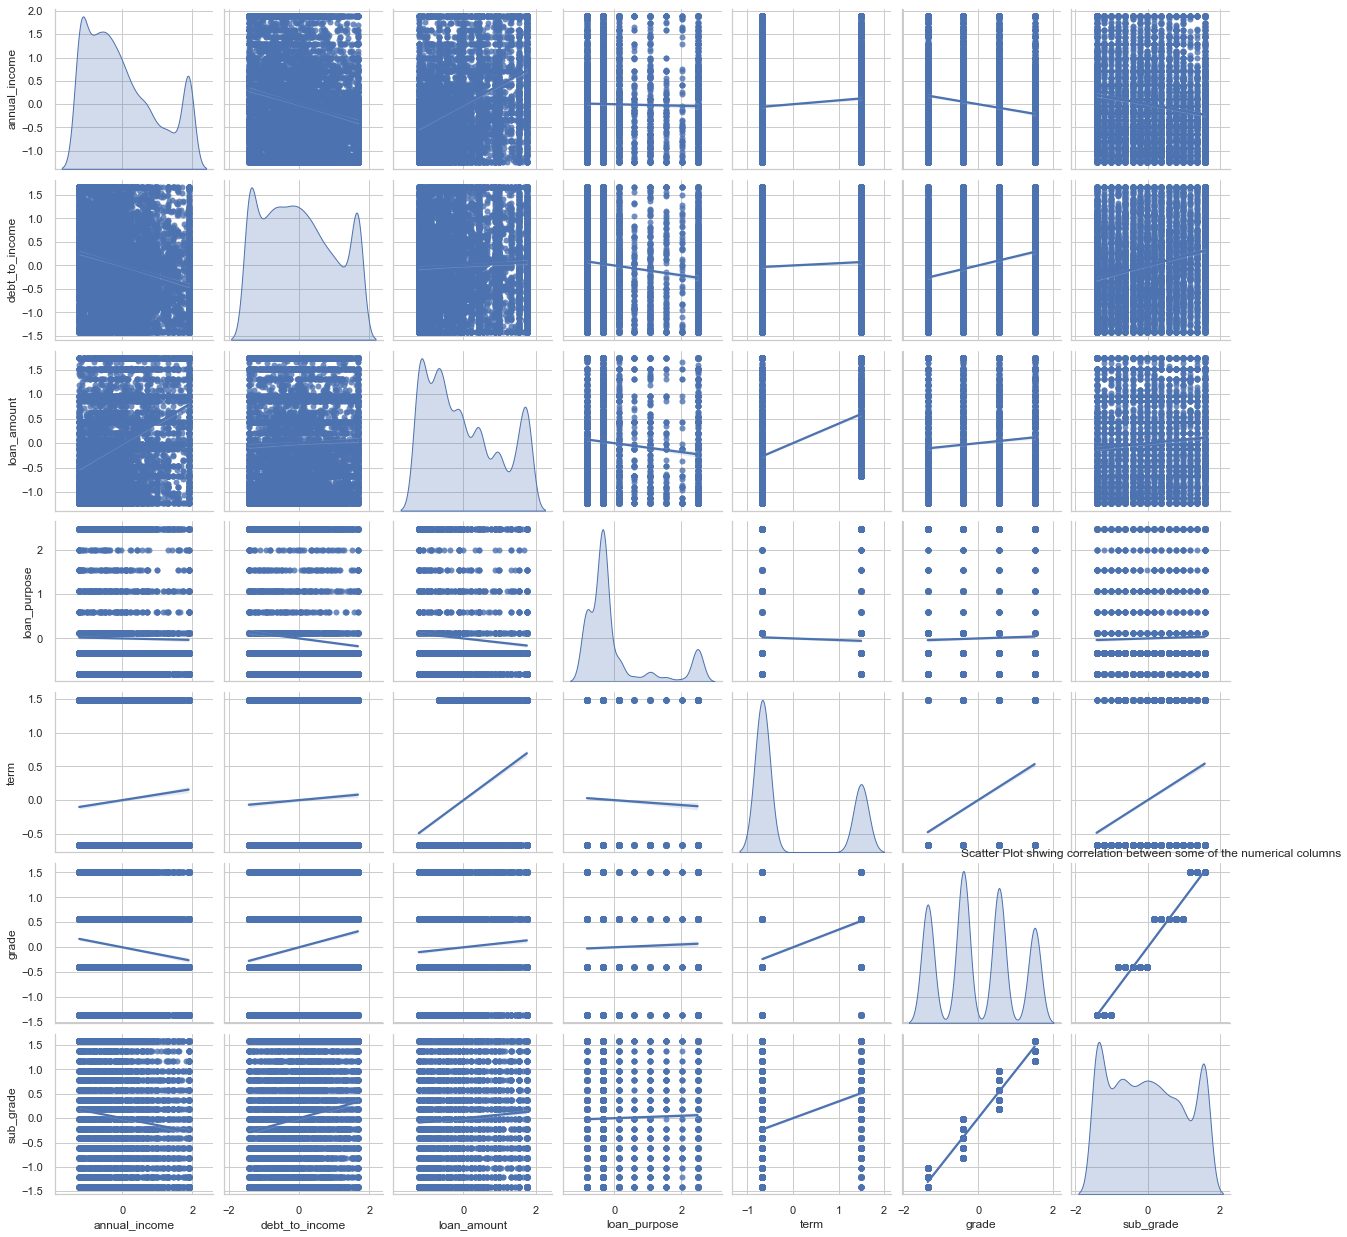

In [248]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

numerical_features=["annual_income","debt_to_income","loan_amount","loan_purpose","term","grade","sub_grade"]

features_copy=loan_features
features_copy[numerical_features].describe().round(2)

df_scaled = scale(features_copy[numerical_features])
df2 = pd.DataFrame(df_scaled, columns=numerical_features)



sns.set(style="whitegrid")
sns.pairplot(df2[numerical_features], kind='reg', diag_kind='kde')
plt.title("Scatter Plot shwing correlation between some of the numerical columns")
plt.show()

The above scatter plot show that for many mariable they is no corelation and they are randomly distributed.

In [177]:
loan_features=loan_features.drop(columns=["emp_title","emp_length","inquiries_last_12m","issue_month","loan_status"])

In [178]:
loan_features=loan_features.drop(columns=["disbursement_method","verified_income","num_accounts_30d_past_due"])

In [179]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(loan_features, target, test_size=0.3, random_state=40) 

In [180]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [181]:
print(lm.intercept_)


8.891377826588235


Text(0.5, 1.0, 'Scatter Plot to visualize the output')

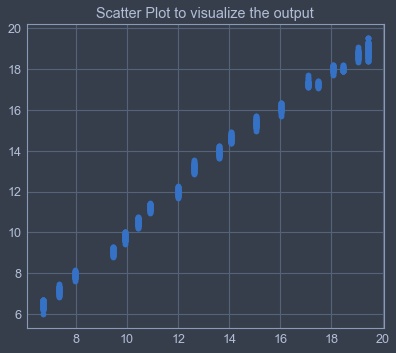

In [205]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.title("Scatter Plot to visualize the output")

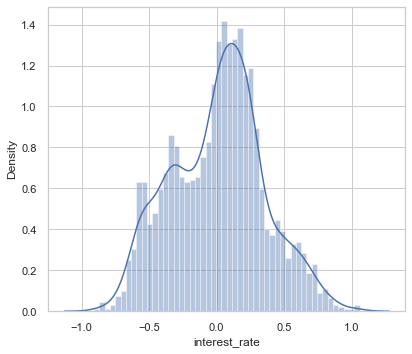

In [183]:
sn.distplot((y_test-predictions),bins=50);

In [184]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

lin_mae=metrics.mean_absolute_error(y_test, predictions)
lin_mse=metrics.mean_squared_error(y_test, predictions)
lin_rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))

MAE: 0.27748456093211293
MSE: 0.11859325928837669
RMSE: 0.34437372038002073


Predicted Output vs Orginal Values

In [204]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df.head(10))

      Actual  Predicted
9937   10.42  10.609948
3420   15.05  15.302260
7992   12.62  13.121623
3455   12.62  13.168307
9454   10.41  10.546815
649    12.62  13.146576
7428   15.05  15.234301
2378    9.43   9.153333
4929   10.91  11.235819
6836   13.59  13.911005


In [210]:
print('Training score: {}'.format(lm.score(X_train, y_train)))
print('Test score: {}'.format(lm.score(X_test, y_test)))

Training score: 0.9904239697428645
Test score: 0.9932737037644891


In [185]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(n_estimators=45, max_depth=10, random_state=0)
rfg.fit(X_train, y_train)

y_pred=rfg.predict(X_test)

Text(0.5, 1.0, 'Scatter Plot to visualize the output for Random Forest Regressor')

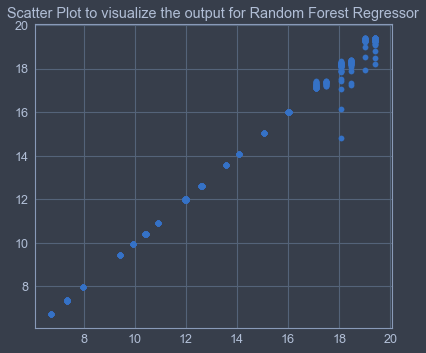

In [206]:
plt.scatter(y_test,y_pred)
plt.title("Scatter Plot to visualize the output for Random Forest Regressor")

In [186]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

reg_mae=metrics.mean_absolute_error(y_test, y_pred)
reg_mse=metrics.mean_squared_error(y_test, y_pred)
reg_rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.02845900419207253
Mean Squared Error: 0.013522066127699768
Root Mean Squared Error: 0.11628441910978345


In [208]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1.head(10))

      Actual  Predicted
9937   10.42  10.419090
3420   15.05  15.048120
7992   12.62  12.619671
3455   12.62  12.619589
9454   10.41  10.414117
649    12.62  12.619362
7428   15.05  15.047748
2378    9.43   9.432219
4929   10.91  10.906797
6836   13.59  13.589833


In [218]:
print('Training score: {}'.format(rfg.score(X_train, y_train)))
print('Test score: {}'.format(rfg.score(X_test, y_test)))

Training score: 0.9994928117928517
Test score: 0.9992330641468423


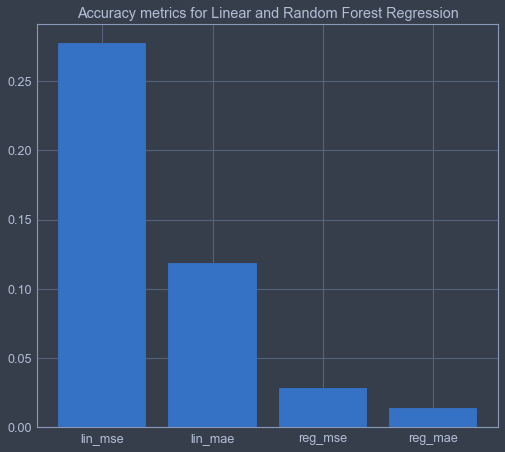

In [217]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
metrics = ['lin_mse', 'lin_mae', 'reg_mse', 'reg_mae']
scores = [lin_mae, lin_mse, reg_mae, reg_mse]
width=0.40
ax.bar(metrics,scores)
plt.title("Accuracy metrics for Linear and Random Forest Regression")
plt.show()

The above two graphs show that the ditribution is linear and normally distributed indicating that the Linear Regression model has performed well. The error values observed in both the models is very less indicating good performance. 

Future Work : I would want to use more sophisticated techniques for feature selection and combine more models to improve performance.